In [1]:
!pip install torch torchvision matplotlib scikit-learn seaborn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 33.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 31.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 18.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 43.6 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitlin

In [2]:
import torch
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import seaborn as sns
import torchvision
import torchvision.transforms as transforms
import torch.nn as nn
import numpy as np

In [3]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")
mean = (0.4914, 0.4822, 0.4465)
std  = (0.2023, 0.1994, 0.2010)
transforms_train = transforms.Compose([
    transforms.RandomCrop(32, padding = 4),
    transforms.RandomHorizontalFlip(p = 0.4),
    transforms.ToTensor(),
    transforms.Normalize(mean, std)
])
transforms_test = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(mean, std)
])

train_set = torchvision.datasets.CIFAR10(
    root = "./data",
    train = True,
    download= True,
    transform= transforms_train
)
test_set = torchvision.datasets.CIFAR10(
    root = "./data",
    train = False,
    transform = transforms_test
)

train_size = 40000
validation_size = 50000 - train_size
generator = torch.Generator().manual_seed(42)
train_set, validation_set = torch.utils.data.random_split(train_set, [train_size, validation_size], generator= generator)

train_dataloader = DataLoader(
    train_set,
    batch_size = 128,
    shuffle = True,
    num_workers = 2
)
validation_dataloader = DataLoader(
    validation_set,
    batch_size = 128,
    shuffle = False,
    num_workers= 2
)
test_dataloader = DataLoader(
    test_set,
    batch_size = 100,
    shuffle = False,
    num_workers= 2
)
print(f"Number of samples in train_set: {len(train_set)}")
print(f"Number of samples in validation_set: {len(validation_set)}")
print(f"Number of samples in test_set: {len(test_set)}")

Using device: cuda


100%|██████████| 170M/170M [00:03<00:00, 43.6MB/s]


Number of samples in train_set: 40000
Number of samples in validation_set: 10000
Number of samples in test_set: 10000


In [4]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

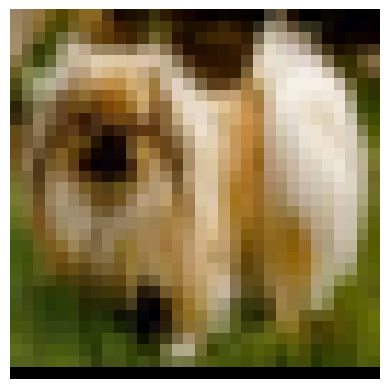

label: dog


In [5]:
def show_cifar_image(img_tensor):
    img = img_tensor.clone()
    for c in range(3):
        img[c] = img[c] * std[c] + mean[c]
    img = img.clamp(0, 1)
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.axis('off')
    plt.show()

index = 10
image, label = train_set[index]
show_cifar_image(image)
print(f"label: {class_names[label]}")


In [13]:
import torch.nn as nn
class VGGMini(nn.Module):
    def __init__(self, num_classes=10):
        super(VGGMini, self).__init__()
        self.features = nn.Sequential(
            # Block 1 (deeper)
            nn.Conv2d(3, 64, kernel_size=3, padding=1),
            nn.BatchNorm2d(64),
            nn.ReLU(inplace=True),
            nn.Conv2d(64, 64, kernel_size=3, padding=1),
            nn.BatchNorm2d(64),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),

            # Block 2 (deeper and wider)
            nn.Conv2d(64, 128, kernel_size=3, padding=1),
            nn.BatchNorm2d(128),
            nn.ReLU(inplace=True),
            nn.Conv2d(128, 128, kernel_size=3, padding=1),
            nn.BatchNorm2d(128),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),

            # Block 3 (deeper and wider)
            nn.Conv2d(128, 256, kernel_size=3, padding=1),
            nn.BatchNorm2d(256),
            nn.ReLU(inplace=True),
            nn.Conv2d(256, 256, kernel_size=3, padding=1),
            nn.BatchNorm2d(256),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2)
        )
        self.avgpool = nn.AdaptiveAvgPool2d((1, 1))
        self.classifier = nn.Sequential(
            nn.Linear(256, 128),
            nn.ReLU(inplace=True),
            nn.Dropout(p=0.5),
            nn.Linear(128,10)
        )

    def forward(self, x):
        x = self.features(x)
        x = self.avgpool(x)
        x = x.view(x.size(0), -1)
        x = self.classifier(x)
        return x

In [24]:
model = VGGMini().to(device)
criterion = nn.CrossEntropyLoss(label_smoothing= 0.1)
optimizer = torch.optim.Adam(model.parameters(), lr = 0.001, weight_decay= 1e-4)
num_epochs = 25

train_losses = []
train_accuracies = []
val_losses = []
val_accuracies = []

for epoch in range(num_epochs):
    model.train()
    train_correct = 0
    train_loss = 0
    train_total = 0
    for inputs, labels in train_dataloader:
        inputs, labels = inputs.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=1.0)
        optimizer.step()
        train_loss += loss.item() * inputs.size(0)
        _, predicted = torch.max(outputs, 1)
        train_total += labels.size(0)
        train_correct += (predicted == labels).sum().item()
    avg_train_loss = train_loss / len(train_dataloader.dataset)
    train_accuracy = 100 * train_correct / train_total
    train_losses.append(avg_train_loss)
    train_accuracies.append(train_accuracy)
    print(f"Epoch {epoch + 1}, Train Loss: {avg_train_loss:.4f}, Train Accuracy: {train_accuracy:.2f}%")

    model.eval()
    correct = 0
    total = 0
    val_loss = 0.0
    with torch.no_grad():
        for batch_inputs, batch_labels in validation_dataloader:
            inputs, labels = batch_inputs.to(device), batch_labels.to(device)
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            val_loss += loss.item() * inputs.size(0)
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    avg_val_loss = val_loss / len(validation_dataloader.dataset)
    val_accuracy = 100 * correct / total
    val_losses.append(avg_val_loss)
    val_accuracies.append(val_accuracy)
    print(f"Validation Loss after Epoch {epoch+1}: {avg_val_loss:.4f}, Validation Accuracy: {val_accuracy:.2f}%")

Epoch 1, Train Loss: 1.6708, Train Accuracy: 45.09%
Validation Loss after Epoch 1: 1.5680, Validation Accuracy: 50.95%
Epoch 2, Train Loss: 1.3666, Train Accuracy: 61.83%
Validation Loss after Epoch 2: 1.5028, Validation Accuracy: 53.57%
Epoch 3, Train Loss: 1.2345, Train Accuracy: 68.79%
Validation Loss after Epoch 3: 1.3040, Validation Accuracy: 64.08%
Epoch 4, Train Loss: 1.1460, Train Accuracy: 73.55%
Validation Loss after Epoch 4: 1.1439, Validation Accuracy: 72.51%
Epoch 5, Train Loss: 1.0850, Train Accuracy: 76.71%
Validation Loss after Epoch 5: 1.0553, Validation Accuracy: 75.93%
Epoch 6, Train Loss: 1.0380, Train Accuracy: 78.78%
Validation Loss after Epoch 6: 1.0693, Validation Accuracy: 76.14%
Epoch 7, Train Loss: 1.0001, Train Accuracy: 80.77%
Validation Loss after Epoch 7: 1.0213, Validation Accuracy: 78.30%
Epoch 8, Train Loss: 0.9645, Train Accuracy: 82.12%
Validation Loss after Epoch 8: 1.0078, Validation Accuracy: 78.85%
Epoch 9, Train Loss: 0.9416, Train Accuracy: 83.

In [25]:
model.eval()
test_correct = 0
test_total = 0
all_preds = []
all_labels = []

with torch.no_grad():
    for batch_inputs, batch_labels in test_dataloader:
      inputs, labels = batch_inputs.to(device), batch_labels.to(device)
      outputs = model(inputs)
      loss = criterion(outputs, labels)
      _, predicted = torch.max(outputs, 1)
      test_total += labels.size(0)
      test_correct += (predicted == labels).sum().item()
      all_preds.extend(predicted.cpu().numpy())
      all_labels.extend(labels.cpu().numpy())
accuracy = 100 * test_correct / test_total
print(f"Test Accuracy: {accuracy:.2f}%")
torch.save(model.state_dict(), "vgg_mini_cifar10.pth")
print("Model saved successfully.")

Test Accuracy: 86.92%
Model saved successfully.


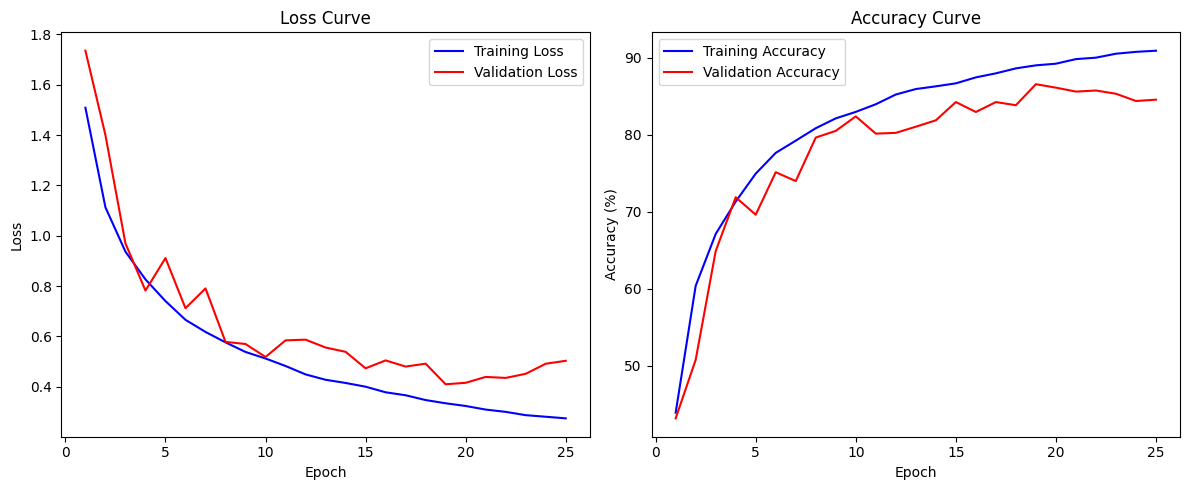

In [22]:
def plot_learning_curve(train_losses, val_losses, train_accuracies, val_accuracies):
    epochs = range(1, len(train_losses) + 1)
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(epochs, train_losses, 'b-', label='Training Loss')
    plt.plot(epochs, val_losses, 'r-', label='Validation Loss')
    plt.title('Loss Curve')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(epochs, train_accuracies, 'b-', label='Training Accuracy')
    plt.plot(epochs, val_accuracies, 'r-', label='Validation Accuracy')
    plt.title('Accuracy Curve')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy (%)')
    plt.legend()
    plt.tight_layout()
    plt.show()

plot_learning_curve(train_losses, val_losses, train_accuracies, val_accuracies)

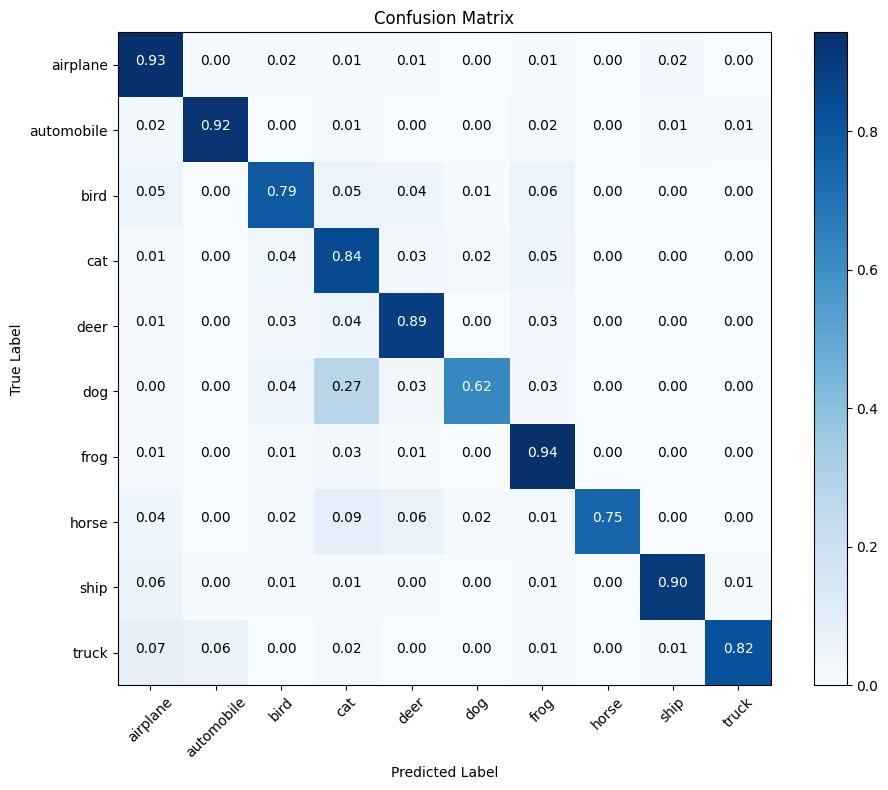

In [23]:
from sklearn.metrics import confusion_matrix
def plot_confusion_matrix(true_labels, pred_labels, classes):
    cm = confusion_matrix(true_labels, pred_labels)
    cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    plt.figure(figsize=(10, 8))
    plt.imshow(cm_normalized, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title('Confusion Matrix')
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    thresh = cm_normalized.max() / 2.
    for i in range(cm_normalized.shape[0]):
        for j in range(cm_normalized.shape[1]):
            plt.text(j, i, format(cm_normalized[i, j], '.2f'),
                     horizontalalignment="center",
                     color="white" if cm_normalized[i, j] > thresh else "black")
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.tight_layout()
    plt.show()

plot_confusion_matrix(all_labels, all_preds, class_names)